In [1]:
!pip install -q ultralytics

In [2]:
import os
import random
random.seed(42)
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def copy_data(images_path, labels_path, destination_path, train_ratio=0.8, random_seed=42):
    # Create new directories for train and val in the destination path
    train_dir = os.path.join(destination_path, 'train')
    val_dir = os.path.join(destination_path, 'val')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Create subdirectories for 'images' and 'labels' within 'train' and 'val'
    train_images_dir = os.path.join(train_dir, 'images')
    train_labels_dir = os.path.join(train_dir, 'labels')
    val_images_dir = os.path.join(val_dir, 'images')
    val_labels_dir = os.path.join(val_dir, 'labels')
    os.makedirs(train_images_dir, exist_ok=True)
    os.makedirs(train_labels_dir, exist_ok=True)
    os.makedirs(val_images_dir, exist_ok=True)
    os.makedirs(val_labels_dir, exist_ok=True)

    # List all image and label files
    image_files = os.listdir(os.path.join(images_path, 'train'))
    label_files = os.listdir(os.path.join(labels_path, 'train')) 
    
    
    test_size=(1 - train_ratio)
    num_test = int(len(label_files)*test_size)+1
    
    for i in tqdm(range(num_test), desc='Creating validation part'):
        picked = random.choice(image_files)
        img_name = picked
        lbl_name = picked.replace('.jpg', '.txt')
        image_files.remove(img_name)
        label_files.remove(lbl_name)
        shutil.copy2(os.path.join(images_path,'train',img_name), os.path.join(val_images_dir, img_name))
        shutil.copy2(os.path.join(labels_path,'train',lbl_name), os.path.join(val_labels_dir,lbl_name))
#         print(type(img_name))
#         print(lbl_name)

    for f in image_files:
        img_name = f
        lbl_name = f.replace('.jpg','.txt')
        shutil.copy2(os.path.join(images_path,'train',img_name), os.path.join(train_images_dir, img_name))
        shutil.copy2(os.path.join(labels_path,'train',lbl_name), os.path.join(train_labels_dir,lbl_name))
        
#     # Copy images and labels to 'images' and 'labels' folders in train
#     for image_file in tqdm(image_train, desc='Copying train images'):
#         shutil.copy2(os.path.join(images_path, 'train', image_file), os.path.join(train_images_dir, image_file))
#     for label_file in tqdm(label_train, desc='Copying train labels'):
#         shutil.copy2(os.path.join(labels_path, 'train', label_file), os.path.join(train_labels_dir, label_file))

#     # Copy remaining images and labels to 'images' and 'labels' folders in val
#     for image_file in tqdm(image_val, desc='Copying val images'):
#         shutil.copy2(os.path.join(images_path, 'train', image_file), os.path.join(val_images_dir, image_file))
#     for label_file in tqdm(label_val, desc='Copying val labels'):
#         shutil.copy2(os.path.join(labels_path, 'train', label_file), os.path.join(val_labels_dir, label_file))

if __name__ == "__main__":
    # Replace 'path/to/your/images', 'path/to/your/labels', and 'path/to/your/destination' with the actual paths
    images_folder = '/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images'
    labels_folder = '/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels'
    destination_folder = '/kaggle/working/'

    copy_data(images_folder, labels_folder, destination_folder)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Creating validation part: 100%|██████████| 1180/1180 [00:23<00:00, 51.05it/s]


In [4]:
i = [f for f in os.listdir("/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train")]
print(len(i))

l = [f for f in os.listdir('/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train')]
print(len(l))
print(len(l)*0.2)

5896
5896
1179.2


In [5]:
l = [f for f in os.listdir('/kaggle/working/train/images')]
print(len(l))

4716


In [6]:
!tree -d

.
|-- train
|   |-- images
|   `-- labels
`-- val
    |-- images
    `-- labels

6 directories


# EDA's

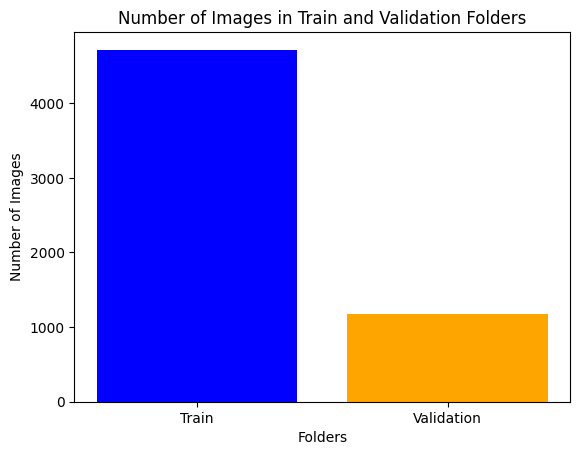

In [7]:
import os
import matplotlib.pyplot as plt

# Define the paths to the image folders
train_path = "/kaggle/working/train/images"
val_path = "/kaggle/working/val/images"

# Function to count the number of images in a folder
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Count the number of images in each folder
train_images_count = count_images(train_path)
val_images_count = count_images(val_path)

# Bar plot
folders = ['Train', 'Validation']
image_counts = [train_images_count, val_images_count]

plt.bar(folders, image_counts, color=['blue', 'orange'])
plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Number of Images in Train and Validation Folders')
plt.show()


[{'class_id': 7, 'center_x': 0.30000000000000004, 'center_y': 0.6291666666666667, 'center_width': 0.01875, 'center_height': 0.08055555555555556}, {'class_id': 1, 'center_x': 0.2984375, 'center_y': 0.6555555555555556, 'center_width': 0.0109375, 'center_height': 0.04722222222222222}, {'class_id': 0, 'center_x': 0.346484375, 'center_y': 0.6222222222222221, 'center_width': 0.03515625, 'center_height': 0.09166666666666666}, {'class_id': 6, 'center_x': 0.378125, 'center_y': 0.6076388888888888, 'center_width': 0.0078125, 'center_height': 0.020833333333333332}, {'class_id': 6, 'center_x': 0.412109375, 'center_y': 0.6159722222222221, 'center_width': 0.01015625, 'center_height': 0.03194444444444444}, {'class_id': 7, 'center_x': 0.4125, 'center_y': 0.5944444444444444, 'center_width': 0.0125, 'center_height': 0.027777777777777776}, {'class_id': 7, 'center_x': 0.46406250000000004, 'center_y': 0.6125, 'center_width': 0.0109375, 'center_height': 0.058333333333333334}, {'class_id': 7, 'center_x': 0.32

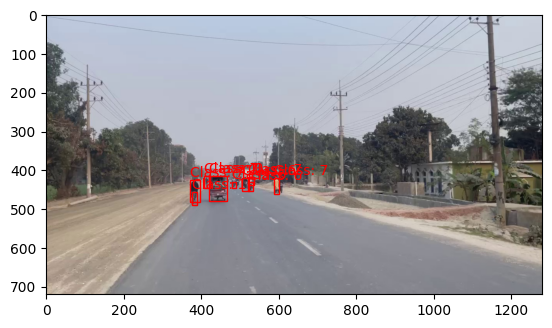

In [8]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def read_labels(label_file_path):
    with open(label_file_path, 'r') as file:
        lines = file.readlines()

    annotations = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        confidence_score = float(parts[1])
        center_x, center_y, center_width, center_height = map(float, parts[1:])
        annotations.append({'class_id': class_id,
                            'center_x': center_x, 'center_y': center_y,
                            'center_width': center_width, 'center_height': center_height})

    return annotations

def get_bounding_box_coordinates(image_width, image_height, x_center, y_center, width, height):
    # Calculate the coordinates of the bounding box
    x_center_pixel = x_center * image_width
    y_center_pixel = y_center * image_height
    half_width = width * image_width / 2
    half_height = height * image_height / 2

    # Calculate the coordinates of the bounding box
    xmin = int(x_center_pixel - half_width)
    ymin = int(y_center_pixel - half_height)
    xmax = int(x_center_pixel + half_width)
    ymax = int(y_center_pixel + half_height)

    return xmin, ymin, xmax, ymax

def plot_image_with_boxes(image_path, labels):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for label in labels:
        class_id = label['class_id']
        center_x, center_y, center_width, center_height = label['center_x'], label['center_y'], label['center_width'], label['center_height']

        # Calculate bounding box using center coordinates
        xmin, ymin, xmax, ymax = get_bounding_box_coordinates(image.shape[1], image.shape[0], center_x, center_y, center_width, center_height)

        rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin, f'Class: {class_id}', color='r', verticalalignment='bottom')

    plt.show()

# Example usage to choose a random image and its label
label_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train"
image_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train"

# Get a list of all label files
label_files = [file for file in os.listdir(label_folder) if file.endswith('.txt')]

# Choose a random label file
random_label_file = random.choice(label_files)

# Form the paths for the image and label
image_file = random_label_file.replace('.txt', '.jpg')
image_path = os.path.join(image_folder, image_file)
label_path = os.path.join(label_folder, random_label_file)

# Read labels and plot the image with bounding boxes
labels = read_labels(label_path)
print(labels)
plot_image_with_boxes(image_path, labels)


In [9]:
def read_labels(label_file_path):
    with open(label_file_path, 'r') as file:
        lines = file.readlines()

    annotations = []
    for line in lines:
        parts = line.strip().split()
#         return parts
        if len(parts) < 5:
            # Handle cases where there might be fewer values in a line
            print(f"Skipping line with insufficient values: {line}")
            continue

        class_id = int(parts[0])
#         return class_id
        x1 = float(parts[1])
        y1 = float(parts[2])
        width=float(parts[3])
        height=float(parts[4])
        annotations.append({'class_id': class_id,
                            'x1': x1, 'y1': y1, 'width': width, 'height': height})

    return annotations

(1080, 1920)


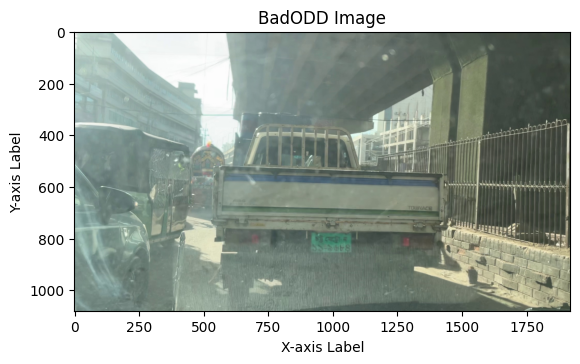

In [10]:
image_path="/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train/chittagong_bohoddarhat1_10030.jpg"
image=cv2.imread(image_path)
height,width,_=image.shape
print((height,width))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a Matplotlib figure and axes
fig, ax = plt.subplots()

# Display the image with axes
ax.imshow(image_rgb)

# Customize the plot (optional)
ax.set_title('BadODD Image')
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')

# Show the plot
plt.show()

In [11]:
import os

# Define the class ID to name mapping
class_id_to_name = {
    0: 'auto_rickshaw',
    1: 'bicycle',
    2: 'bus',
    3: 'car',
    4: 'cart_vehicle',
    5: 'construction_vehicle',
    6: 'motorbike',
    7: 'person',
    8: 'priority_vehicle',
    9: 'three_wheeler',
    10: 'train',
    11: 'truck',
    12: 'wheelchair'
}

# Define the label folder path
label_folder = "/kaggle/working/train/labels"

# Initialize a dictionary to store class counts
class_counts = {class_id: 0 for class_id in class_id_to_name}

# Iterate through each text file in the label folder
for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(label_folder, filename)
        
        # Read the content of the label file and count class occurrences
        with open(file_path, 'r') as file:
            lines = file.readlines()

        for line in lines:
            parts = line.strip().split()
            if parts:  # Check if the line is not empty
                class_id = int(parts[0])
                if class_id in class_counts:
                    class_counts[class_id] += 1

# Print the class counts
for class_id, count in class_counts.items():
    class_name = class_id_to_name[class_id]
    print(f'Class {class_id} ({class_name}): {count} instances')


Class 0 (auto_rickshaw): 8474 instances
Class 1 (bicycle): 539 instances
Class 2 (bus): 1512 instances
Class 3 (car): 3049 instances
Class 4 (cart_vehicle): 117 instances
Class 5 (construction_vehicle): 22 instances
Class 6 (motorbike): 3004 instances
Class 7 (person): 14284 instances
Class 8 (priority_vehicle): 195 instances
Class 9 (three_wheeler): 4512 instances
Class 10 (train): 1 instances
Class 11 (truck): 1820 instances
Class 12 (wheelchair): 2 instances


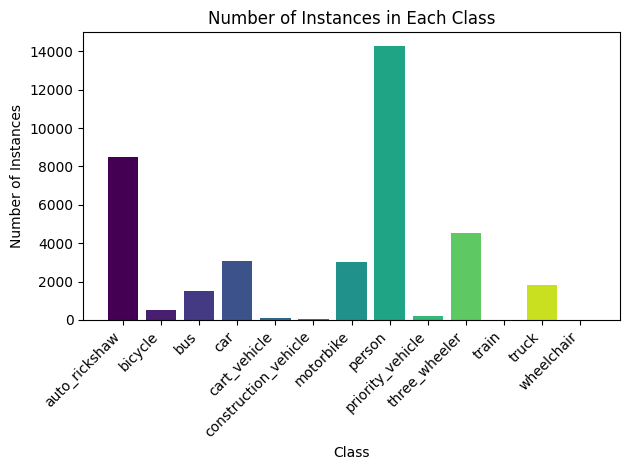

In [12]:
import numpy as np
# Create a bar plot
class_ids = list(class_counts.keys())
# print(class_ids)
class_names = [class_id_to_name[class_id] for class_id in class_ids]
counts = list(class_counts.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(class_ids)))

plt.bar(class_names, counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Number of Instances in Each Class')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train/sylhet2_20119.jpg /kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train/sylhet2_20119.txt
(1080, 1920, 3)


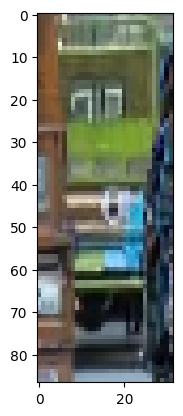

In [13]:
import cv2
#Load the predicted test image
# Example usage to choose a random image and its label
label_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/labels/train"
image_folder = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/train"

# Get a list of all label files
label_files = [file for file in os.listdir(label_folder) if file.endswith('.txt')]

# Choose a random label file
random_label_file = random.choice(label_files)

# Form the paths for the image and label
image_file = random_label_file.replace('.txt', '.jpg')
image_path = os.path.join(image_folder, image_file)
label_path = os.path.join(label_folder, random_label_file)
print(image_path,label_path)


image_path = image_path
image = cv2.imread(image_path)
print(image.shape)
# Specify the path to the text file prediction ([label, x_center, y_center, width, height])
txt_file_path = label_path
with open(txt_file_path, 'r') as file:
    lines=file.readlines()
for i, line in enumerate(lines):
#Split the line into its components
    parts=line.split()
    if len(parts) == 5:
        class_id, center_x, center_y, width, height = map(float, parts)
        #yolov7 was training with image size of 640x640
#         print(width,height)
        img_width = 640
        img_height = 640
        xmin, ymin, xmax, ymax = get_bounding_box_coordinates(img_width, img_height,center_x, center_y, width, height) #function call
        #Crop the image to extract the bounding box region
        image = cv2.resize(image, (640, 640))
        cropped_region = image [ymin:ymax, xmin:xmax]
        # Display the cropped region
        plt.imshow(cropped_region)
#         cv2.waitKey(0) # Wait for a key press (in milliseconds) to close the window
# cv2.destroyAllWindows()

# Preprocessing

In [14]:
import albumentations as A
import cv2
from PIL import Image
import random
random.seed(42)
TARGET_HEIGHT = 1080
TARGET_WIDTH = 1920

In [15]:
transform = A.Compose([
    A.Resize(height=TARGET_HEIGHT, width=TARGET_WIDTH), 
    A.GaussianBlur(p=0.3),
    A.MedianBlur(p=0.3),
    A.CLAHE(p=0.2),
    A.HorizontalFlip(p=0.8),
    A.ZoomBlur(max_factor=1.3, step_factor=(0.01, 0.03), always_apply=False, p=0.3),
    A.ColorJitter(
        contrast=0.3,
        saturation=0.7,
        hue=0.015,
        brightness=0.4,
    ),  
    A.RandomBrightnessContrast(contrast_limit=(0.3, 0.3), brightness_limit=(-0.4, -0.4), p=1.),
    A.HueSaturationValue(hue_shift_limit=(1, 1), p=1.),
    A.ToFloat(max_value=255.0),
    A.Normalize (mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=True, p=1.0)
], bbox_params=A.BboxParams(format='coco', label_fields=[]))

In [16]:
def applyaugmentation(train_dir='', transform_pipeline=None):
    if train_dir=='':
        raise ValueError("Path is not given")
    images_path = os.path.join(train_dir, 'images')
    labels_path = os.path.join(train_dir, 'labels')

    label_files = [os.path.join(labels_path,file) for file in os.listdir(labels_path) if file.endswith('.txt')]
#     augmented_root = "/kaggle/working/train_aug"
    
#     os.makedirs(augmented_root, exist_ok=True)
#     os.makedirs(os.path.join(augmented_root,'images'), exist_ok=True)
#     os.makedirs(os.path.join(augmented_root,'labels'), exist_ok=True)
    
    for label_path in tqdm(label_files, desc="Applying augmentation"):
        img_path = label_path.replace('labels', 'images').replace('.txt','.jpg')
#         print(img_path)
#         print(label_path)
        
        np_image = np.array(Image.open(img_path).convert("RGB"))
        # Specify the path to the text file prediction ([label, x_center, y_center, width, height])
        txt_file_path = label_path
        class_labels = []
        boxes = []
        with open(txt_file_path, 'r') as file:
            lines=file.readlines()
        for i, line in enumerate(lines):
        #Split the line into its components
            parts=line.split()
            if len(parts) == 5:
                class_id, center_x, center_y, width, height = map(float, parts)
                class_labels.append(int(class_id))
                boxes.append([center_x,center_y, width, height])
#         print("Class_labels: ", class_labels)
#         print("Boxes: ", boxes)
        # now the applying albugmentation
        if transform_pipeline:
            for i,_ in enumerate(range(3)):

                transform_result = transform_pipeline(image=np_image, bboxes=boxes, class_labels= class_labels)
                basic_transformed_image = transform_result["image"]
                basic_transformed_bboxes = transform_result["bboxes"]
                basic_transformed_labels = transform_result["class_labels"]
                f_name = img_path.split('/')[-1].split('.')[0]
                f_name += f"_{i}"
                i_name = os.path.join('/kaggle/working/train/images', f_name+".jpg")
                l_name = os.path.join('/kaggle/working/train/labels', f_name+'.txt')
#                 print(i_name)
#                 print(l_name)
                _img = Image.fromarray(basic_transformed_image, 'RGB')
                _img.save(i_name)
#                 print(basic_transformed_image.shape)
#                 print(basic_transformed_labels)
#                 print(basic_transformed_bboxes)
#                 plt.imshow(basic_transformed_image)
#                 plt.show()
                with open(l_name,'a') as file:
                    
                    for l, b in zip(basic_transformed_labels, basic_transformed_bboxes):
                        file.write(str(l))
                        line=''
                        for point in b:
                            line += " "+str(point)
                        file.write(line+'\n')
        else:
            raise ValueError("Albugmentor pipeline is not given")

In [17]:
# applyaugmentation("/kaggle/working/train", transform_pipeline=transform)

In [18]:
"chuadanga_sirajganj1_28260.jpg" in os.listdir('/kaggle/working/train/images/')

True

In [19]:
i = [f for f in os.listdir("/kaggle/working/train/images")]
print(len(i))

l = [f for f in os.listdir('/kaggle/working/train/labels')]
print(len(l))

4716
4716


In [20]:
i = [f for f in os.listdir("/kaggle/working/val/images")]
print(len(i))

l = [f for f in os.listdir('/kaggle/working/val/labels')]
print(len(l))

1180
1180



# YOLO Training

In [21]:
file_content = """
path: /kaggle/working/  # dataset root dir
train: ./train/images  # train images (relative to 'path')
val: ./val/images  # val images (relative to 'path')
test:  /kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test

# Classes
names:
    0: auto_rickshaw
    1: bicycle
    2: bus
    3: car
    4: cart_vehicle
    5: construction_vehicle
    6: motorbike
    7: person
    8: priority_vehicle
    9: three_wheeler
    10: train
    11: truck
    12: wheelchair
"""

with open("data.yaml", mode="w") as f:
    f.write(file_content)

In [22]:
# Weights & Biases ...

import wandb
wandb.init(mode="disabled")

In [23]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
model.train(data="/kaggle/working/data.yaml", 
            epochs=500,
            deterministic=True,
            seed=42,
            pretrained=True,
            batch=8,
            val=True,
            device=0,
            cos_lr= True
           )



#     # Data & model parameters
#     data="/kaggle/working/data.yaml", 
#     save=True,

    
# model = YOLO("yolov8s.pt")
# model.train(
#     # Project
# #     project="BadODD",
# #     name="yolov8s",

#     # Random Seed parameters
    
#     ,
#     imgsz=640,
    
#     # Augmentation
#     perspective=0.3,
#     mosaic=0.8,
#     scale=0.3,
#     translate=0.4,

#     # Training parameters
#     epochs=25,
#     batch=8,
#     workers=2,
#     val=True,
#     device=0,
#     dropout=0.2,
    
#     # Optimization parameters
    
#     lr0=0.001,
#     patience=20,
#     optimizer="SGD",
#     momentum=0.9,
#     weight_decay=0.005,
#     cos_lr= True
# )

100%|██████████| 21.5M/21.5M [00:00<00:00, 187MB/s]


Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/data.yaml, epochs=500, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]
2024-02-04 15:43:47,703	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-04 15:43:48,330	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 92.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 4716 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4716/4716 [00:03<00:00, 1209.65it/s]


train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/val/labels... 1180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1180/1180 [00:00<00:00, 1213.08it/s]

val: New cache created: /kaggle/working/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      2.24G      1.327      1.646      1.143         96        640: 100%|██████████| 590/590 [01:55<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  4.96it/s]


                   all       1180       9587      0.738      0.383      0.421      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      2.34G      1.269      1.102       1.11         42        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.30it/s]


                   all       1180       9587      0.685       0.39      0.447      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      2.33G      1.316      1.123      1.133         84        640: 100%|██████████| 590/590 [01:47<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.48it/s]


                   all       1180       9587      0.571      0.409      0.422      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      2.35G      1.364      1.155       1.16         41        640: 100%|██████████| 590/590 [01:46<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.88it/s]


                   all       1180       9587       0.64      0.417      0.443      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      2.35G      1.358      1.126      1.162         74        640: 100%|██████████| 590/590 [01:47<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.20it/s]


                   all       1180       9587      0.611        0.4      0.436       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      2.43G      1.351      1.094      1.159         57        640: 100%|██████████| 590/590 [01:46<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.18it/s]


                   all       1180       9587      0.764      0.407      0.481      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      2.36G      1.337      1.063      1.148         78        640: 100%|██████████| 590/590 [01:46<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.699      0.448      0.503      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      2.33G      1.312      1.028       1.14         58        640: 100%|██████████| 590/590 [01:46<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.22it/s]


                   all       1180       9587      0.777      0.423      0.497      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      2.34G        1.3      1.009      1.131         39        640: 100%|██████████| 590/590 [01:46<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.49it/s]


                   all       1180       9587      0.728      0.437      0.505      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      2.42G      1.299      1.003      1.132         52        640: 100%|██████████| 590/590 [01:46<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.41it/s]


                   all       1180       9587      0.735      0.465      0.527      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      2.42G      1.285     0.9758      1.127         85        640: 100%|██████████| 590/590 [01:47<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.02it/s]


                   all       1180       9587      0.675      0.507      0.518      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      2.35G      1.279     0.9668      1.124         65        640: 100%|██████████| 590/590 [01:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.05it/s]


                   all       1180       9587      0.695       0.47      0.522      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      2.43G      1.279     0.9502      1.121         31        640: 100%|██████████| 590/590 [01:46<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.07it/s]


                   all       1180       9587      0.764      0.467      0.548      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      2.41G      1.269     0.9391      1.118         38        640: 100%|██████████| 590/590 [01:47<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.36it/s]


                   all       1180       9587      0.741      0.472      0.542      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      2.47G      1.252     0.9183      1.112         57        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.711      0.482       0.54      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      2.36G      1.248     0.9152       1.11         74        640: 100%|██████████| 590/590 [01:48<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.09it/s]


                   all       1180       9587      0.719      0.509      0.549      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      2.36G      1.245     0.9021      1.105         54        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.31it/s]


                   all       1180       9587      0.765      0.494      0.566      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      2.33G      1.242     0.8913      1.103         44        640: 100%|██████████| 590/590 [01:48<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.30it/s]


                   all       1180       9587      0.711      0.496      0.551      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      2.33G      1.233     0.8823      1.102         33        640: 100%|██████████| 590/590 [01:48<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.79it/s]


                   all       1180       9587      0.791      0.502      0.575       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      2.36G      1.225     0.8775      1.098         73        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.03it/s]


                   all       1180       9587      0.731      0.531      0.574      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      2.41G      1.214     0.8623      1.096         40        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.05it/s]


                   all       1180       9587      0.739      0.527      0.584       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      2.42G      1.215     0.8559      1.094         53        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.81it/s]


                   all       1180       9587      0.753      0.514      0.573      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      2.36G      1.215     0.8507       1.09         98        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.19it/s]


                   all       1180       9587      0.744      0.513      0.569      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      2.36G      1.203     0.8379      1.089         71        640: 100%|██████████| 590/590 [01:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.00it/s]


                   all       1180       9587      0.746      0.507      0.579      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      2.44G      1.206     0.8434      1.087         82        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.26it/s]


                   all       1180       9587      0.736      0.504      0.572      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      2.36G      1.195      0.829      1.083         51        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.13it/s]


                   all       1180       9587       0.75      0.539      0.591      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      2.35G      1.191     0.8177      1.076         54        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.34it/s]


                   all       1180       9587      0.778      0.515      0.589      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      2.36G      1.194     0.8184      1.079         93        640: 100%|██████████| 590/590 [01:49<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.17it/s]


                   all       1180       9587      0.735      0.552      0.602      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      2.34G      1.188     0.8129      1.075         60        640: 100%|██████████| 590/590 [01:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.34it/s]


                   all       1180       9587       0.77      0.513      0.597      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      2.33G      1.181     0.8139      1.075         54        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.92it/s]


                   all       1180       9587      0.773      0.524      0.593       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      2.33G      1.175     0.7958      1.071         37        640: 100%|██████████| 590/590 [01:50<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.17it/s]


                   all       1180       9587       0.78      0.505      0.582       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      2.36G       1.18     0.8057      1.073         30        640: 100%|██████████| 590/590 [01:50<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.27it/s]


                   all       1180       9587      0.754      0.558      0.597      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      2.45G       1.17     0.7913      1.071         70        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.22it/s]


                   all       1180       9587      0.739      0.529      0.589      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      2.33G      1.167     0.7937      1.069         55        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.11it/s]


                   all       1180       9587      0.741      0.547      0.594       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      2.36G      1.168       0.79      1.067         56        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.00it/s]


                   all       1180       9587      0.769      0.526      0.599      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      2.35G      1.163     0.7842      1.065         59        640: 100%|██████████| 590/590 [01:48<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.65it/s]


                   all       1180       9587      0.768      0.552      0.602      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      2.36G      1.158     0.7725       1.06         45        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.07it/s]


                   all       1180       9587      0.797      0.534      0.601      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      2.42G      1.163     0.7724      1.059         48        640: 100%|██████████| 590/590 [01:50<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  4.98it/s]


                   all       1180       9587      0.797      0.545      0.614      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      2.41G      1.139     0.7569      1.054         58        640: 100%|██████████| 590/590 [01:49<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.15it/s]


                   all       1180       9587      0.753       0.54      0.601      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      2.36G      1.154     0.7568       1.06         87        640: 100%|██████████| 590/590 [01:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.81it/s]


                   all       1180       9587      0.665      0.556      0.602      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500       2.4G       1.14     0.7535      1.051         28        640: 100%|██████████| 590/590 [01:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.18it/s]


                   all       1180       9587      0.805      0.538      0.605      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      2.35G      1.148     0.7529      1.055         32        640: 100%|██████████| 590/590 [01:47<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.03it/s]


                   all       1180       9587      0.782      0.548      0.603       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      2.33G      1.143     0.7557      1.056         66        640: 100%|██████████| 590/590 [01:47<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.52it/s]


                   all       1180       9587      0.765      0.559      0.615      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      2.34G      1.145     0.7511      1.053         37        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.41it/s]


                   all       1180       9587      0.684      0.567      0.625      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      2.44G      1.139     0.7447      1.053         84        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.28it/s]


                   all       1180       9587      0.675      0.571      0.618      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      2.39G      1.136     0.7455      1.051         83        640: 100%|██████████| 590/590 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.72it/s]


                   all       1180       9587      0.805      0.511      0.599      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      2.45G      1.134     0.7422      1.052         70        640: 100%|██████████| 590/590 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.09it/s]


                   all       1180       9587      0.792      0.529      0.603      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      2.35G      1.128     0.7358      1.049         55        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.15it/s]


                   all       1180       9587      0.685      0.547      0.605      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      2.45G       1.13     0.7339      1.046         52        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.23it/s]


                   all       1180       9587      0.816      0.524      0.603      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      2.36G      1.123     0.7312      1.045         52        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.05it/s]


                   all       1180       9587      0.719      0.558      0.627        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      2.43G      1.123     0.7288      1.048         37        640: 100%|██████████| 590/590 [01:47<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  4.97it/s]


                   all       1180       9587      0.798      0.556      0.616      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      2.35G      1.118     0.7214      1.044         67        640: 100%|██████████| 590/590 [01:47<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.29it/s]


                   all       1180       9587      0.791      0.531      0.607       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      2.41G       1.11     0.7197      1.041         93        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.49it/s]


                   all       1180       9587      0.764      0.558      0.615      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500       2.4G      1.119     0.7214      1.044         48        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.18it/s]


                   all       1180       9587      0.771      0.571      0.625      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      2.38G      1.113     0.7151       1.04         33        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.25it/s]


                   all       1180       9587      0.833      0.558       0.64      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      2.32G      1.113     0.7132       1.04         83        640: 100%|██████████| 590/590 [01:47<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.38it/s]


                   all       1180       9587      0.697      0.562      0.623      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      2.36G      1.115     0.7178      1.043         35        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.36it/s]


                   all       1180       9587      0.838      0.549      0.639      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      2.42G      1.097        0.7      1.032         57        640: 100%|██████████| 590/590 [01:47<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.55it/s]


                   all       1180       9587      0.783      0.556      0.628       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      2.33G      1.104     0.7072      1.037         51        640: 100%|██████████| 590/590 [01:47<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.36it/s]


                   all       1180       9587      0.701      0.566      0.641      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      2.34G      1.104     0.7065      1.036         74        640: 100%|██████████| 590/590 [01:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.20it/s]


                   all       1180       9587      0.756      0.582      0.628      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      2.47G      1.102     0.7013      1.033         56        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.26it/s]


                   all       1180       9587      0.812      0.541      0.624      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500       2.4G      1.097     0.6981      1.034         27        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.03it/s]


                   all       1180       9587      0.661       0.58      0.625      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      2.34G      1.096     0.6935      1.032         34        640: 100%|██████████| 590/590 [01:50<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.31it/s]


                   all       1180       9587      0.815      0.563       0.64      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      2.34G      1.096      0.698      1.031         46        640: 100%|██████████| 590/590 [01:51<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.21it/s]


                   all       1180       9587      0.794      0.569      0.636      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      2.37G      1.095     0.6947      1.029         56        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.46it/s]


                   all       1180       9587      0.829      0.537      0.631      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      2.42G      1.089     0.6914      1.031         29        640: 100%|██████████| 590/590 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.07it/s]


                   all       1180       9587      0.777      0.588      0.638      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      2.37G      1.082     0.6857      1.024         62        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.822      0.557      0.638      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      2.32G      1.086     0.6869      1.028         91        640: 100%|██████████| 590/590 [01:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.22it/s]


                   all       1180       9587      0.788      0.573      0.644      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      2.33G      1.081     0.6815      1.025         71        640: 100%|██████████| 590/590 [01:50<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.29it/s]


                   all       1180       9587      0.788      0.574      0.642      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      2.47G      1.071     0.6782      1.026         68        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.27it/s]


                   all       1180       9587      0.787      0.566       0.63       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      2.35G       1.08      0.675      1.022         73        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.17it/s]


                   all       1180       9587      0.797       0.56      0.632      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      2.33G      1.074     0.6725      1.021         74        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.61it/s]


                   all       1180       9587       0.77      0.594      0.646      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      2.35G      1.071     0.6661       1.02         45        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.21it/s]


                   all       1180       9587      0.793      0.569      0.637      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      2.36G      1.079     0.6713      1.021         58        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.23it/s]


                   all       1180       9587      0.676       0.59      0.633      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      2.34G      1.077     0.6726      1.022         51        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.43it/s]


                   all       1180       9587       0.67      0.592      0.636      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      2.34G       1.07     0.6671      1.018         85        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.41it/s]


                   all       1180       9587      0.781      0.582      0.644      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      2.41G      1.077     0.6711      1.023         49        640: 100%|██████████| 590/590 [01:46<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.62it/s]


                   all       1180       9587      0.822      0.569      0.652      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      2.36G      1.067     0.6631      1.018         74        640: 100%|██████████| 590/590 [01:45<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.42it/s]


                   all       1180       9587      0.793      0.605      0.646      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      2.36G      1.059     0.6639      1.015         33        640: 100%|██████████| 590/590 [01:47<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.37it/s]


                   all       1180       9587      0.822      0.575      0.654      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      2.41G      1.062     0.6617      1.014         50        640: 100%|██████████| 590/590 [01:47<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.773      0.614      0.647      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      2.49G      1.059     0.6541      1.014         68        640: 100%|██████████| 590/590 [01:47<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.34it/s]


                   all       1180       9587      0.788      0.599      0.659       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      2.36G       1.06     0.6535      1.015         24        640: 100%|██████████| 590/590 [01:47<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.47it/s]


                   all       1180       9587      0.799      0.581      0.642       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      2.41G       1.06     0.6551      1.015         53        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.50it/s]


                   all       1180       9587      0.827      0.563      0.644      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      2.35G      1.061     0.6545      1.012         88        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.17it/s]


                   all       1180       9587      0.813      0.557      0.638      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500       2.4G      1.056     0.6572      1.013         46        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.53it/s]


                   all       1180       9587      0.777      0.573      0.636      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      2.44G      1.053     0.6483      1.013         61        640: 100%|██████████| 590/590 [01:46<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.87it/s]


                   all       1180       9587      0.759      0.587      0.638      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      2.39G      1.048     0.6446      1.008        104        640: 100%|██████████| 590/590 [01:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.59it/s]


                   all       1180       9587      0.819      0.592       0.66      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      2.33G      1.054     0.6466      1.013         75        640: 100%|██████████| 590/590 [01:45<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.24it/s]


                   all       1180       9587      0.801      0.574      0.641      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      2.33G      1.043     0.6422      1.007         38        640: 100%|██████████| 590/590 [01:50<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.11it/s]


                   all       1180       9587       0.84      0.578      0.655      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      2.36G      1.046     0.6406      1.005         54        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.38it/s]


                   all       1180       9587      0.801      0.576      0.646      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      2.34G       1.04     0.6392      1.008         51        640: 100%|██████████| 590/590 [01:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.31it/s]


                   all       1180       9587      0.822      0.587      0.654       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      2.34G      1.041     0.6385      1.006         46        640: 100%|██████████| 590/590 [01:49<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.50it/s]


                   all       1180       9587      0.703      0.592      0.654      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      2.41G      1.041      0.642      1.007         91        640: 100%|██████████| 590/590 [01:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.52it/s]


                   all       1180       9587      0.685      0.595      0.648      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      2.39G      1.044     0.6386      1.008         53        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.45it/s]


                   all       1180       9587      0.778      0.579      0.647      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      2.45G       1.04     0.6316      1.006         46        640: 100%|██████████| 590/590 [01:49<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.82it/s]


                   all       1180       9587      0.787      0.575      0.647      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      2.35G      1.033     0.6314      1.003         67        640: 100%|██████████| 590/590 [01:47<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.36it/s]


                   all       1180       9587      0.767      0.587      0.656      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      2.35G      1.036     0.6342      1.003         90        640: 100%|██████████| 590/590 [01:46<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.813      0.575      0.664      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      2.39G      1.029     0.6305      1.001         44        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.13it/s]


                   all       1180       9587      0.813      0.563      0.642      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      2.37G      1.031     0.6304      0.998         44        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.689      0.575      0.643      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      2.35G      1.037     0.6329      1.003         58        640: 100%|██████████| 590/590 [01:47<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.55it/s]


                   all       1180       9587      0.673      0.598      0.647      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      2.32G      1.035     0.6313      1.003         56        640: 100%|██████████| 590/590 [01:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.49it/s]


                   all       1180       9587      0.711      0.569      0.643      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      2.41G      1.023     0.6246          1         69        640: 100%|██████████| 590/590 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.52it/s]


                   all       1180       9587      0.711      0.567      0.663      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      2.33G      1.029     0.6242      0.999         33        640: 100%|██████████| 590/590 [01:48<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.31it/s]


                   all       1180       9587      0.612      0.699       0.69      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      2.36G      1.025     0.6204     0.9971         28        640: 100%|██████████| 590/590 [01:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.44it/s]


                   all       1180       9587      0.825      0.566       0.65      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      2.49G      1.023     0.6207     0.9996         48        640: 100%|██████████| 590/590 [01:47<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.24it/s]


                   all       1180       9587      0.806      0.572      0.656      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      2.44G      1.019     0.6201     0.9918         34        640: 100%|██████████| 590/590 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.35it/s]


                   all       1180       9587      0.819      0.567      0.648      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500       2.4G      1.023     0.6206     0.9931         27        640: 100%|██████████| 590/590 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.44it/s]


                   all       1180       9587      0.654      0.695      0.669      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      2.35G      1.018     0.6105     0.9958         41        640: 100%|██████████| 590/590 [01:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.46it/s]

                   all       1180       9587      0.803      0.579      0.654       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      2.38G      1.019     0.6181      0.995         79        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.50it/s]

                   all       1180       9587      0.715      0.577      0.652      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      2.37G      1.017     0.6157     0.9967         67        640: 100%|██████████| 590/590 [01:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.45it/s]


                   all       1180       9587      0.713      0.592       0.65      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      2.36G      1.017     0.6129     0.9964         67        640: 100%|██████████| 590/590 [01:47<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.49it/s]


                   all       1180       9587      0.785      0.599      0.653      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      2.34G       1.01     0.6087     0.9924         54        640: 100%|██████████| 590/590 [01:46<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.82it/s]


                   all       1180       9587      0.688      0.606      0.655      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      2.36G      1.014     0.6151     0.9936         69        640: 100%|██████████| 590/590 [01:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.17it/s]


                   all       1180       9587      0.666      0.605      0.648      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      2.38G      1.011     0.6143     0.9919         59        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.22it/s]


                   all       1180       9587      0.678        0.6      0.659       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      2.33G      1.007     0.6049     0.9891         64        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.12it/s]


                   all       1180       9587      0.693      0.598      0.661      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      2.34G      1.008     0.6109     0.9907         65        640: 100%|██████████| 590/590 [01:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.02it/s]


                   all       1180       9587      0.689      0.599       0.66      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      2.42G      1.008     0.6048     0.9918         41        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.24it/s]


                   all       1180       9587      0.614      0.728      0.676      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      2.34G      1.001     0.6038     0.9901         32        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.82it/s]


                   all       1180       9587      0.781      0.598      0.683      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      2.47G      1.011     0.6089     0.9905         66        640: 100%|██████████| 590/590 [01:46<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.51it/s]


                   all       1180       9587       0.72      0.718      0.743      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      2.34G      1.005     0.6029     0.9868         43        640: 100%|██████████| 590/590 [01:47<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.23it/s]


                   all       1180       9587      0.763      0.691      0.738      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      2.43G     0.9953     0.5992     0.9881         46        640: 100%|██████████| 590/590 [01:50<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.33it/s]


                   all       1180       9587      0.802      0.603      0.663      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      2.41G      1.003     0.6025     0.9859         86        640: 100%|██████████| 590/590 [01:50<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.798      0.594      0.652      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      2.41G      1.005     0.6021     0.9889         88        640: 100%|██████████| 590/590 [01:50<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.34it/s]


                   all       1180       9587      0.813      0.597      0.675      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      2.34G      0.994     0.5955     0.9838         30        640: 100%|██████████| 590/590 [01:50<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.43it/s]


                   all       1180       9587      0.694      0.703      0.695       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      2.41G     0.9963     0.5933     0.9827         49        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.80it/s]


                   all       1180       9587      0.745      0.679      0.738      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      2.42G      1.001     0.6004     0.9869         48        640: 100%|██████████| 590/590 [01:47<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.55it/s]


                   all       1180       9587      0.785       0.67      0.738      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      2.33G     0.9979     0.5931     0.9824         91        640: 100%|██████████| 590/590 [01:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.18it/s]


                   all       1180       9587      0.634      0.746      0.743      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      2.34G     0.9925     0.5936     0.9828         47        640: 100%|██████████| 590/590 [01:50<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.07it/s]


                   all       1180       9587      0.775      0.599      0.683      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      2.48G     0.9908     0.5946     0.9831         67        640: 100%|██████████| 590/590 [01:50<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.19it/s]


                   all       1180       9587      0.693      0.714       0.74      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      2.36G      0.996     0.5967     0.9872         45        640: 100%|██████████| 590/590 [01:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.29it/s]


                   all       1180       9587      0.827      0.636      0.747      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      2.35G     0.9887     0.5883      0.983         86        640: 100%|██████████| 590/590 [01:49<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.19it/s]


                   all       1180       9587      0.768      0.676      0.745      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      2.33G     0.9894     0.5901     0.9807         70        640: 100%|██████████| 590/590 [01:47<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.37it/s]


                   all       1180       9587      0.821      0.652      0.744      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      2.38G     0.9834     0.5867     0.9798         70        640: 100%|██████████| 590/590 [01:46<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.715      0.705      0.743      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      2.36G     0.9888     0.5882     0.9836         49        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.36it/s]


                   all       1180       9587      0.665      0.712      0.686       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      2.42G      0.982      0.585     0.9823         50        640: 100%|██████████| 590/590 [01:51<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.24it/s]


                   all       1180       9587      0.732       0.71      0.745      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      2.38G     0.9836     0.5886     0.9814         40        640: 100%|██████████| 590/590 [01:50<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.41it/s]


                   all       1180       9587      0.779      0.684       0.75      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      2.44G     0.9803     0.5848     0.9791         61        640: 100%|██████████| 590/590 [01:46<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.41it/s]


                   all       1180       9587      0.736      0.706      0.704      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      2.42G     0.9825     0.5818     0.9793         76        640: 100%|██████████| 590/590 [01:50<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.45it/s]


                   all       1180       9587      0.749      0.703      0.706      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      2.33G     0.9754     0.5796     0.9787         68        640: 100%|██████████| 590/590 [01:46<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.28it/s]


                   all       1180       9587      0.764       0.69      0.701      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      2.35G     0.9729     0.5789     0.9759         27        640: 100%|██████████| 590/590 [01:48<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:17<00:00,  4.24it/s]


                   all       1180       9587      0.713      0.598      0.657      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      2.33G     0.9802     0.5827     0.9795         39        640: 100%|██████████| 590/590 [01:46<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.12it/s]


                   all       1180       9587      0.729        0.7      0.704      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      2.38G     0.9729     0.5774     0.9751         48        640: 100%|██████████| 590/590 [01:46<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:15<00:00,  4.73it/s]


                   all       1180       9587      0.842      0.571      0.673      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      2.38G     0.9689     0.5745     0.9765        108        640: 100%|██████████| 590/590 [01:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.16it/s]


                   all       1180       9587      0.797      0.598      0.677      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      2.35G     0.9768     0.5772     0.9763         41        640: 100%|██████████| 590/590 [01:46<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.38it/s]


                   all       1180       9587      0.804      0.591      0.671      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      2.35G     0.9743     0.5775     0.9765         80        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.40it/s]


                   all       1180       9587      0.633      0.746      0.703      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      2.42G     0.9682     0.5755      0.975         77        640: 100%|██████████| 590/590 [01:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.52it/s]

                   all       1180       9587       0.63      0.747      0.749      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      2.35G     0.9668     0.5722     0.9756         59        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.51it/s]


                   all       1180       9587      0.793      0.611      0.691      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      2.33G     0.9662      0.573     0.9715         77        640: 100%|██████████| 590/590 [01:45<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.31it/s]


                   all       1180       9587      0.809      0.609       0.68      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      2.36G      0.962     0.5726     0.9705         46        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.30it/s]


                   all       1180       9587      0.797      0.612      0.682      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      2.42G      0.958     0.5671     0.9726         83        640: 100%|██████████| 590/590 [01:45<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.46it/s]


                   all       1180       9587      0.791      0.623      0.675      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      2.49G     0.9595     0.5689     0.9708         64        640: 100%|██████████| 590/590 [01:48<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.44it/s]


                   all       1180       9587      0.792      0.616      0.672      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      2.35G     0.9703     0.5703     0.9744         64        640: 100%|██████████| 590/590 [01:46<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.47it/s]


                   all       1180       9587      0.831      0.593      0.671      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      2.45G     0.9658     0.5717     0.9756         58        640: 100%|██████████| 590/590 [01:46<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.36it/s]


                   all       1180       9587      0.843      0.579       0.67      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      2.37G     0.9607      0.569     0.9721        102        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.48it/s]


                   all       1180       9587      0.833      0.577      0.668      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      2.34G      0.954     0.5655     0.9683         85        640: 100%|██████████| 590/590 [01:46<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.24it/s]


                   all       1180       9587      0.825      0.582      0.668      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      2.32G     0.9514     0.5644      0.969         43        640: 100%|██████████| 590/590 [01:50<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.19it/s]


                   all       1180       9587      0.816      0.581      0.665      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      2.34G     0.9513     0.5613     0.9688         33        640: 100%|██████████| 590/590 [01:46<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.29it/s]


                   all       1180       9587      0.836       0.57      0.666      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      2.36G      0.956     0.5677     0.9725         66        640: 100%|██████████| 590/590 [01:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.40it/s]


                   all       1180       9587      0.789      0.596      0.666      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      2.33G     0.9521     0.5658     0.9675         29        640: 100%|██████████| 590/590 [01:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.42it/s]


                   all       1180       9587      0.807      0.591      0.665      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      2.34G     0.9449     0.5591     0.9654         72        640: 100%|██████████| 590/590 [01:49<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.32it/s]


                   all       1180       9587      0.815      0.591      0.662      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      2.39G     0.9463     0.5608     0.9658         47        640: 100%|██████████| 590/590 [01:46<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.38it/s]


                   all       1180       9587      0.813      0.598      0.665      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      2.36G     0.9524       0.56     0.9661         35        640: 100%|██████████| 590/590 [01:46<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:17<00:00,  4.35it/s]


                   all       1180       9587      0.815      0.593      0.664      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      2.33G     0.9477     0.5581     0.9646         84        640: 100%|██████████| 590/590 [01:47<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.35it/s]


                   all       1180       9587      0.809      0.599      0.667      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      2.32G      0.948     0.5557     0.9658         71        640: 100%|██████████| 590/590 [01:45<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.39it/s]


                   all       1180       9587      0.826       0.59      0.666      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      2.48G     0.9433     0.5594      0.966         86        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.35it/s]


                   all       1180       9587      0.806      0.604      0.667      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      2.35G     0.9474     0.5557     0.9671         34        640: 100%|██████████| 590/590 [01:45<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.51it/s]


                   all       1180       9587      0.809      0.603      0.667      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      2.44G     0.9413     0.5535     0.9655         65        640: 100%|██████████| 590/590 [01:49<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.63it/s]


                   all       1180       9587      0.799      0.603      0.662      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      2.36G     0.9411     0.5533     0.9628         80        640: 100%|██████████| 590/590 [01:45<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.48it/s]


                   all       1180       9587      0.801      0.603      0.661      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      2.44G     0.9438     0.5538     0.9621         54        640: 100%|██████████| 590/590 [01:49<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.37it/s]


                   all       1180       9587      0.791      0.605       0.66      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      2.34G     0.9364     0.5508     0.9615         50        640: 100%|██████████| 590/590 [01:45<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.37it/s]


                   all       1180       9587        0.7        0.6       0.66      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      2.44G     0.9342     0.5488     0.9618         35        640: 100%|██████████| 590/590 [01:46<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.54it/s]


                   all       1180       9587        0.7      0.594       0.66      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      2.34G     0.9317     0.5495     0.9584         54        640: 100%|██████████| 590/590 [01:46<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.56it/s]


                   all       1180       9587      0.705      0.592      0.661      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      2.34G     0.9382     0.5495     0.9613         42        640: 100%|██████████| 590/590 [01:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.56it/s]


                   all       1180       9587      0.801       0.59      0.666      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      2.36G     0.9317     0.5484     0.9595         23        640: 100%|██████████| 590/590 [01:50<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.40it/s]

                   all       1180       9587      0.796      0.586      0.666      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      2.32G      0.937     0.5469     0.9594         38        640: 100%|██████████| 590/590 [01:46<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.35it/s]


                   all       1180       9587      0.667      0.626      0.669      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      2.36G      0.934     0.5476     0.9576         36        640: 100%|██████████| 590/590 [01:50<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.22it/s]


                   all       1180       9587      0.755      0.629      0.668      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      2.34G      0.933     0.5498     0.9602         18        640: 100%|██████████| 590/590 [01:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.15it/s]


                   all       1180       9587      0.763      0.626      0.669      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      2.49G     0.9272     0.5428     0.9567         53        640: 100%|██████████| 590/590 [01:50<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:14<00:00,  5.24it/s]


                   all       1180       9587      0.787      0.608      0.668      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      2.35G     0.9291     0.5481     0.9593         44        640: 100%|██████████| 590/590 [01:45<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:13<00:00,  5.40it/s]


                   all       1180       9587      0.785      0.609       0.67      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      2.34G     0.9236     0.5427      0.954         78        640: 100%|██████████| 590/590 [01:47<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:16<00:00,  4.52it/s]


                   all       1180       9587      0.808        0.6       0.67      0.434
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 130, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

180 epochs completed in 6.213 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:21<00:00,  3.51it/s]


                   all       1180       9587      0.826      0.636      0.746      0.456
         auto_rickshaw       1180       2140      0.916      0.796      0.892      0.652
               bicycle       1180        134      0.841      0.403      0.607      0.291
                   bus       1180        373      0.846      0.646      0.754      0.508
                   car       1180        736      0.885      0.667      0.767      0.544
          cart_vehicle       1180         24       0.46      0.248      0.434      0.225
  construction_vehicle       1180          1      0.834          1      0.995      0.301
             motorbike       1180        745       0.88      0.657      0.748       0.42
                person       1180       3726      0.906      0.571      0.729       0.42
      priority_vehicle       1180         34      0.754      0.631      0.681       0.54
         three_wheeler       1180       1198      0.902      0.774      0.866      0.623
                 truc

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4ed626f610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

# Prediction

In [24]:
# Directory path ...
test_directory = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test"

# Load the model ...
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

In [25]:
# get prediction boxes string according to the submission format ...

def get_prediction_string(boxes, scores, classes):
    pred_strs = []
    for i, score in enumerate(scores):
        single_pred_str = ""
        single_pred_str += str(float(classes[i])) + " " + str(float(score)) + " "
        
        x_center , y_center, width,height = boxes[i]
        x1 = float(x_center) - (float(width) / 2)
        y1 = float(y_center) - (float(height) / 2)
        width = float(width)
        height = float(height)
        #single_pred_str += " ".join(str(float(x)) for x in boxes[i])
        single_pred_str +=  f"{x1} {y1} {width} {height}"
        
        pred_strs.append(single_pred_str)
    ans = ','.join(map(str, pred_strs))
    if len(ans):
        return ans
#     the solution metrics faield in case of a NaN, '' (empty). So, return "0 0 0 0 0 0" for NaN, '' (empty) string
    return "0 0 0 0 0 0"

# get the predcition in id, ImageID, PredictionString_pred foramt ...

def get_prediction_entry(i, filename, boxes, scores, classes):
    return {
        "id": i, # strating from 0 ...
        "ImageID": filename.split('.')[0], # before the extension ...
        "PredictionString_pred": get_prediction_string(boxes, scores, classes)
    }


# do the inference ...

def predict_all_files(test_directory):
    predictions = []
    for i,filename in tqdm(enumerate(os.listdir(test_directory))):
        if filename.endswith(".jpg"):
            filepath = os.path.join(test_directory, filename)
            results = model.predict(source=filepath, conf=0.50, verbose=False)
            boxes = results[0].boxes.xywhn
            scores = results[0].boxes.conf
            classes = results[0].boxes.cls
            prediction = get_prediction_entry(i, filename, boxes, scores, classes)
            predictions.append(prediction)
#             to csv format ...
    predictions_df = pd.DataFrame(predictions)
    predictions_df.to_csv("submission.csv", index=False)

# call the inference function ...
predict_all_files(test_directory)

1964it [01:47, 18.21it/s]


In [26]:
submission_df = pd.read_csv('/kaggle/working/submission.csv')
submission_df

,id,ImageID,PredictionString_pred
0,0,sherpur2_1073,6.0 0.8544543981552124 0.6961274668574333 0.46...
1,1,mymensingh1_0,7.0 0.8844871520996094 0.4268231987953186 0.09...
2,2,mymensingh1_96860,9.0 0.870434045791626 0.56711770221591 0.15555...
3,3,khulna4_22590,0.0 0.9276919364929199 0.09774933755397797 0.0...
4,4,mymensingh1_106713,0.0 0.9298744797706604 0.17013506591320038 0.0...
...,...,...,...
1959,1959,mymensingh1_90013,0.0 0.9163327813148499 0.24451013654470444 0.0...
1960,1960,chittagong_bohoddarhat2_8673,3.0 0.8413524627685547 0.46584872901439667 0.6...
1961,1961,sylhet1_32475,0.0 0.9540783762931824 0.6572597771883011 0.04...
1962,1962,chittagong_night1_12840,3.0 0.6771705746650696 0.22337883338332176 0.6...


In [27]:
submission_df[submission_df['PredictionString_pred'] == "0 0 0 0 0 0"]

,id,ImageID,PredictionString_pred
32,32,maowa_expressway2_13511,0 0 0 0 0 0
53,53,dhaka_night3_62127,0 0 0 0 0 0
74,74,maowa_expressway1_472,0 0 0 0 0 0
92,92,maowa_expressway1_295,0 0 0 0 0 0
113,113,maowa_expressway2_36875,0 0 0 0 0 0
...,...,...,...
1857,1857,dhaka_night3_46905,0 0 0 0 0 0
1893,1893,maowa_expressway2_17995,0 0 0 0 0 0
1894,1894,chittagong_night1_11700,0 0 0 0 0 0
1924,1924,dhaka_night3_40769,0 0 0 0 0 0


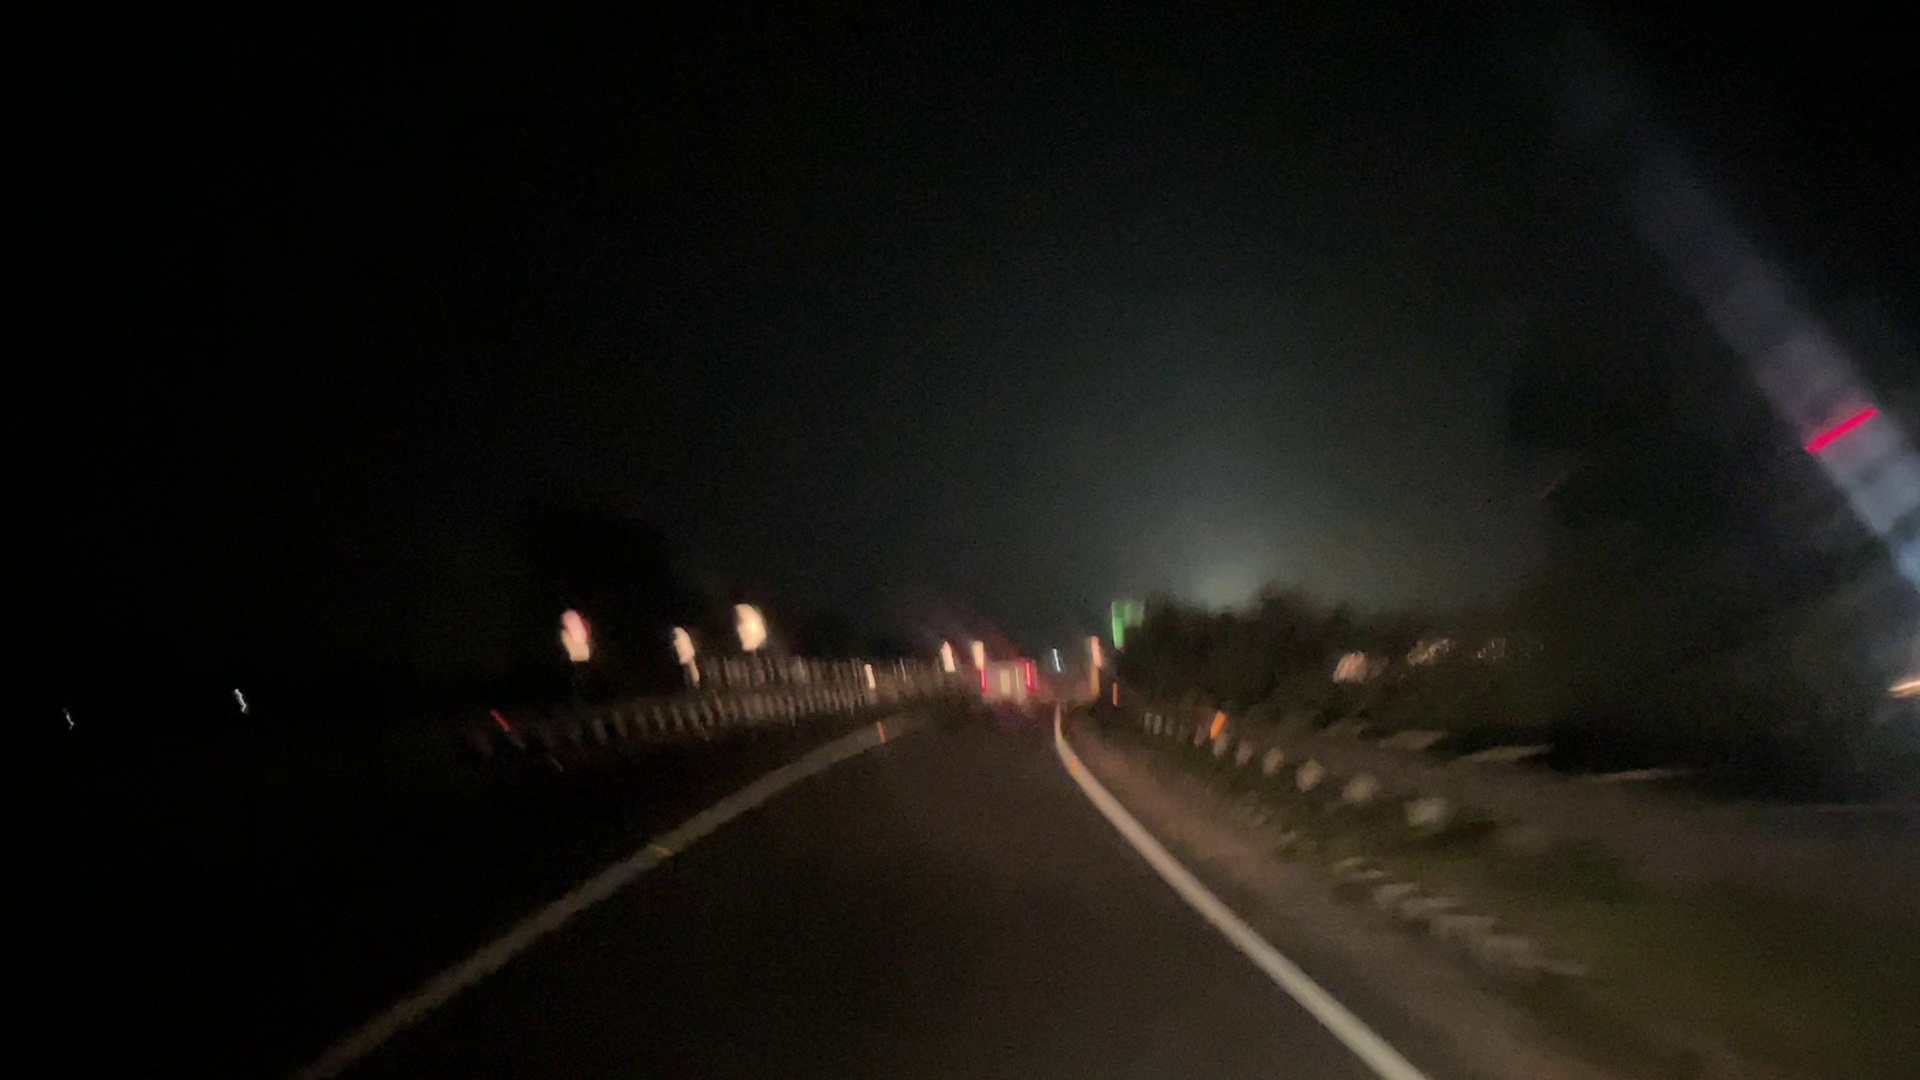

In [28]:
from IPython.display import Image, display

image_path = "/kaggle/input/dl-enigma-10-sust-cse-carnival-2024/dlenigma1/BadODD/images/test/dhaka_night3_62127.jpg"
display(Image(filename=image_path))
